In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split. Crossval score. Gridsearch CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Import Standard Scaller
from sklearn.preprocessing import StandardScaler


# Import logistic regression. KNN.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Import metrics
from sklearn import metrics

#Import Pipeline
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# imports

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from nltk.stem.porter import PorterStemmer
import string





from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Read in the Reddit data
df = pd.read_csv('./data/redditproject.csv')

In [3]:
df.head()

,title,score,id,url,comms_num,created,body,subreddit
0,When exactly did this whole Force dyad between...,5,jakk3z,https://www.reddit.com/r/saltierthancrait/comm...,9,1.602646e+09,NaN,saltierthancrait
1,"Hol up, can you even jam speeders?",5,jaj49d,https://www.reddit.com/r/saltierthancrait/comm...,10,1.602642e+09,Just thinking about that scene and how massive...,saltierthancrait
2,Remember in Battlefront 2 (newer one) when you...,86,jah2m7,https://www.reddit.com/r/saltierthancrait/comm...,13,1.602636e+09,Because The Rise of Skywalker doesn't seem to,saltierthancrait
3,Just a friendly reminder of how badly Star War...,324,jah1uf,https://i.redd.it/nlzsftux3ws51.png,45,1.602636e+09,NaN,saltierthancrait
4,Dark Empire Episode 1: The Destiny of a Jedi (...,5,jaflwe,https://www.youtube.com/watch?v=lADCO-Ar76U,2,1.602631e+09,NaN,saltierthancrait


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1993 non-null   object 
 1   score      1993 non-null   int64  
 2   id         1993 non-null   object 
 3   url        1993 non-null   object 
 4   comms_num  1993 non-null   int64  
 5   created    1993 non-null   float64
 6   body       817 non-null    object 
 7   subreddit  1993 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 124.7+ KB


In [5]:
# Replace NaN with empty string
df = df.replace(np.nan, '', regex=True)

In [6]:
# Create a text feature category with title and body
df['features'] = df['title'] + ' ' + df['body']

In [7]:
# Recode the target variable with a binary. Our positive class is saltierthancrait
df['target'] = df['subreddit'].map({'StarWarsCantina': 0, 'saltierthancrait': 1})

In [8]:
df.target.value_counts(normalize = True)

1    0.501254
0    0.498746
Name: target, dtype: float64

# EDA - wordcount!

In [9]:
df1 = df.copy()

In [10]:
df1.head()

,title,score,id,url,comms_num,created,body,subreddit,features,target
0,When exactly did this whole Force dyad between...,5,jakk3z,https://www.reddit.com/r/saltierthancrait/comm...,9,1.602646e+09,,saltierthancrait,When exactly did this whole Force dyad between...,1
1,"Hol up, can you even jam speeders?",5,jaj49d,https://www.reddit.com/r/saltierthancrait/comm...,10,1.602642e+09,Just thinking about that scene and how massive...,saltierthancrait,"Hol up, can you even jam speeders? Just thinki...",1
2,Remember in Battlefront 2 (newer one) when you...,86,jah2m7,https://www.reddit.com/r/saltierthancrait/comm...,13,1.602636e+09,Because The Rise of Skywalker doesn't seem to,saltierthancrait,Remember in Battlefront 2 (newer one) when you...,1
3,Just a friendly reminder of how badly Star War...,324,jah1uf,https://i.redd.it/nlzsftux3ws51.png,45,1.602636e+09,,saltierthancrait,Just a friendly reminder of how badly Star War...,1
4,Dark Empire Episode 1: The Destiny of a Jedi (...,5,jaflwe,https://www.youtube.com/watch?v=lADCO-Ar76U,2,1.602631e+09,,saltierthancrait,Dark Empire Episode 1: The Destiny of a Jedi (...,1


In [11]:
df1['feature_length'] = df1['features'].str.len()

In [12]:
df1['feature_word_count'] = df1['features'].str.split().str.len()

In [13]:
df1['feature_word_count'] = df1['feature_word_count'].mask(df1['feature_word_count'] > 500, 500)


(array([1115.,  288.,  105.,   50.,   60.,   52.,   48.,   29.,   26.,
          18.,   22.,   17.,   12.,   15.,   12.,   13.,   13.,    9.,
           6.,   83.]),
 array([  1.  ,  25.95,  50.9 ,  75.85, 100.8 , 125.75, 150.7 , 175.65,
        200.6 , 225.55, 250.5 , 275.45, 300.4 , 325.35, 350.3 , 375.25,
        400.2 , 425.15, 450.1 , 475.05, 500.  ]),
 <BarContainer object of 20 artists>)

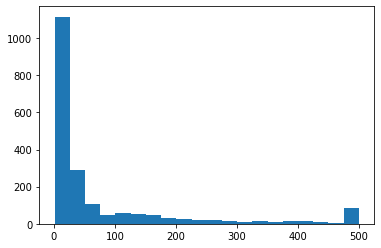

In [14]:
plt.hist(df1.feature_word_count, bins=20)

(array([1.451e+03, 1.510e+02, 1.180e+02, 6.000e+01, 4.300e+01, 3.100e+01,
        3.400e+01, 2.000e+01, 1.800e+01, 1.100e+01, 6.000e+00, 6.000e+00,
        2.000e+00, 8.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([3.00000e+00, 3.26700e+02, 6.50400e+02, 9.74100e+02, 1.29780e+03,
        1.62150e+03, 1.94520e+03, 2.26890e+03, 2.59260e+03, 2.91630e+03,
        3.24000e+03, 3.56370e+03, 3.88740e+03, 4.21110e+03, 4.53480e+03,
        4.85850e+03, 5.18220e+03, 5.50590e+03, 5.82960e+03, 6.15330e+03,
        6.47700e+03, 6.80070e+03, 7.12440e+03, 7.44810e+03, 7.77180e+03,
        8.0

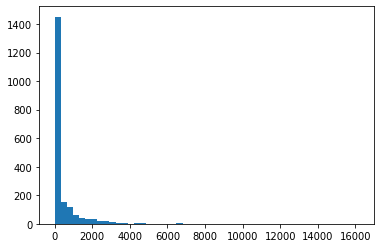

In [15]:
plt.hist(df1.feature_length, bins=50)

FileNotFoundError: [Errno 2] No such file or directory: '../figs/word_count.png'

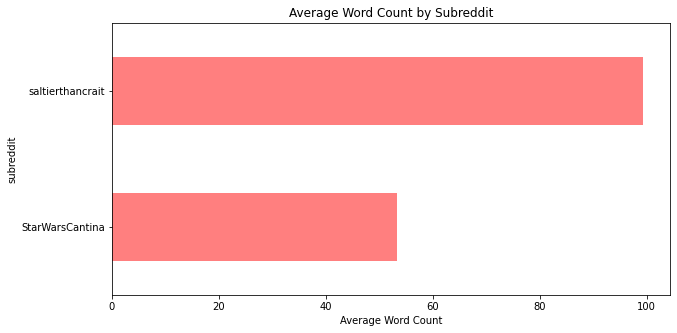

In [16]:
plt.figure(figsize = (10,5))
df1.groupby('subreddit').feature_word_count.mean().plot(kind= 'barh', color = 'red', alpha = 0.5)
#plt.yticks(rotation = 70)
plt.xlabel('Average Word Count')
plt.title('Average Word Count by Subreddit')

plt.savefig("../figs/word_count.png")

In [16]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words = 'english', min_df=3)

In [17]:
cvec.fit(df1['features'])

CountVectorizer(min_df=3, stop_words='english')

In [18]:
feature_transform = cvec.transform(df['features'])

In [19]:
feature_transform_df = pd.DataFrame(feature_transform.todense(), 
                          columns=cvec.get_feature_names())


In [20]:
# plot top occuring words
feature_transform_df.sum().sort_values(ascending = False).head(15)

star         1000
wars          991
like          836
just          811
luke          724
jedi          656
rey           596
new           550
force         488
movie         438
think         399
people        391
trilogy       377
palpatine     369
time          367
dtype: int64

<AxesSubplot:>

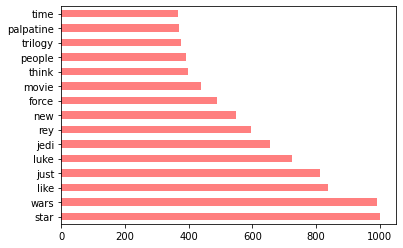

In [49]:
# plot top occuring words
feature_transform_df.sum().sort_values(ascending = False).head(15).plot(kind= 'barh', color = 'red', alpha = 0.5)

In [35]:
df1['tgt'] = df1['target']

In [36]:
df_vec = pd.concat([df1['tgt'], feature_transform_df], axis =1)



In [38]:
df_vec.tgt

0       1
1       1
2       1
3       1
4       1
       ..
1988    0
1989    0
1990    0
1991    0
1992    0
Name: tgt, Length: 1993, dtype: int64

In [39]:
df_vec.head()

,tgt,00,000,01,09,10,100,1000,1080p,11,...,youth,youtu,youtube,youtuber,youtubers,yt,yup,yuuzhan,zahn,zero
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
vec_list = list(feature_transform_df.columns)

<AxesSubplot:>

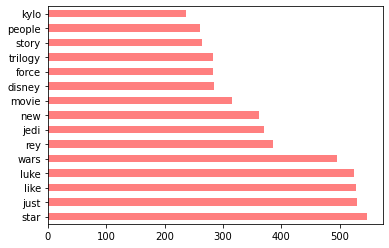

In [50]:
df_vec[df_vec['tgt'] == 1][vec_list].sum().sort_values(ascending = False).head(15).plot(kind= 'barh', color = 'red', alpha = 0.5)

<AxesSubplot:>

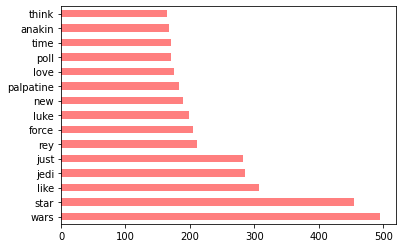

In [51]:
df_vec[df_vec['tgt'] == 0][vec_list].sum().sort_values(ascending = False).head(15).plot(kind= 'barh', color = 'red', alpha = 0.5)

In [54]:
df_vec.shape

(1993, 12096)

# EDA - sentiment!

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [29]:
df_temp = df[['features', 'target']]

In [30]:
df_temp.head()

,features,target
0,When exactly did this whole Force dyad between...,1
1,"Hol up, can you even jam speeders? Just thinki...",1
2,Remember in Battlefront 2 (newer one) when you...,1
3,Just a friendly reminder of how badly Star War...,1
4,Dark Empire Episode 1: The Destiny of a Jedi (...,1


In [31]:
#convert to a list of strings:

corpus = list(df_temp['features'])
corpus[0]

'When exactly did this whole Force dyad between Rey and Kylo emerge? And why? '

In [32]:
#instantiate SIA
sia = SentimentIntensityAnalyzer()

#Get polarity scores for the first tweet
sia.polarity_scores(corpus[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [33]:
#create dataframe that contains text and the polarity scores for each tweet

dicts = []    

for post in corpus:
    scores = sia.polarity_scores(post)
    scores['features'] = post
    dicts.append(scores)

df_vader = pd.DataFrame(dicts)
df_vader.head()

,neg,neu,pos,compound,features
0,0.000,1.000,0.000,0.0000,When exactly did this whole Force dyad between...
1,0.101,0.899,0.000,-0.5574,"Hol up, can you even jam speeders? Just thinki..."
2,0.190,0.810,0.000,-0.7269,Remember in Battlefront 2 (newer one) when you...
3,0.433,0.429,0.137,-0.7845,Just a friendly reminder of how badly Star War...
4,0.000,1.000,0.000,0.0000,Dark Empire Episode 1: The Destiny of a Jedi (...


In [34]:
df_vader['target'] = df['target'].values
df_vader.head(5)

,neg,neu,pos,compound,features,target
0,0.000,1.000,0.000,0.0000,When exactly did this whole Force dyad between...,1
1,0.101,0.899,0.000,-0.5574,"Hol up, can you even jam speeders? Just thinki...",1
2,0.190,0.810,0.000,-0.7269,Remember in Battlefront 2 (newer one) when you...,1
3,0.433,0.429,0.137,-0.7845,Just a friendly reminder of how badly Star War...,1
4,0.000,1.000,0.000,0.0000,Dark Empire Episode 1: The Destiny of a Jedi (...,1


In [35]:
df_stc = df_vader[df_vader['target'] == 1]

In [36]:
df_stc.sort_values(by='pos', ascending=False).head()

,neg,neu,pos,compound,features,target
857,0.0,0.194,0.806,0.8519,What a great love story,1
938,0.0,0.250,0.750,0.7184,Lmao. This aged well.,1
73,0.0,0.286,0.714,0.3612,Y’all agree?,1
746,0.0,0.316,0.684,0.9538,Ahmed Best sharing some black Jedi love today ...,1
656,0.0,0.360,0.640,0.7964,Still a better love story than reylo,1


In [37]:
df_stc.sort_values(by='neg', ascending=False).head()

,neg,neu,pos,compound,features,target
533,1.000,0.000,0.0,-0.3612,Ridiculous.,1
178,0.722,0.278,0.0,-0.6369,It *was* a trap :(,1
524,0.674,0.326,0.0,-0.7351,RIP this poor poor cast,1
289,0.669,0.331,0.0,-0.8442,The People Who Killed Star Wars,1
57,0.629,0.371,0.0,-0.5255,I had a goddamn PLAN!,1


In [38]:
df_swc = df_vader[df_vader['target'] == 0]

In [39]:
df_swc.sort_values(by='pos', ascending = False).head()

,neg,neu,pos,compound,features,target
1183,0.0,0.133,0.867,0.7579,Good for a laugh,0
1136,0.0,0.238,0.762,0.4939,Friendly Reminder,0
1404,0.0,0.263,0.737,0.4215,True Jedi,0
1526,0.0,0.263,0.737,0.8555,Ahmed Best is the best.,0
1671,0.0,0.303,0.697,0.3182,PLEASE READ,0


In [40]:
df_swc.sort_values(by='neg', ascending = False).head()

,neg,neu,pos,compound,features,target
1497,1.000,0.000,0.0,-0.2244,Badass !,0
1903,0.756,0.244,0.0,-0.4767,Wallpaper accident,0
1047,0.625,0.375,0.0,-0.6124,Hard Star Wars Knowledge Quiz,0
1467,0.621,0.379,0.0,-0.8481,Star Wars #6 Was Wild as Hell,0
1541,0.608,0.392,0.0,-0.8971,There Really Are Things Worse Than Death [Star...,0


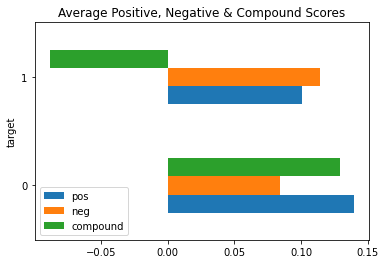

In [41]:
df_vader.groupby('target').mean()[['pos', 'neg', 'compound']].plot(kind='barh')
plt.title('Average Positive, Negative & Compound Scores');


In [42]:
df_vader.drop(columns=['features', 'target'], inplace = True)
df_vader.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.101,0.899,0.000,-0.5574
2,0.190,0.810,0.000,-0.7269
3,0.433,0.429,0.137,-0.7845
4,0.000,1.000,0.000,0.0000


In [43]:
df1.head()

,title,score,id,url,comms_num,created,body,subreddit,features,target,feature_length,feature_word_count
0,When exactly did this whole Force dyad between...,5,jakk3z,https://www.reddit.com/r/saltierthancrait/comm...,9,1.602646e+09,,saltierthancrait,When exactly did this whole Force dyad between...,1,77,14
1,"Hol up, can you even jam speeders?",5,jaj49d,https://www.reddit.com/r/saltierthancrait/comm...,10,1.602642e+09,Just thinking about that scene and how massive...,saltierthancrait,"Hol up, can you even jam speeders? Just thinki...",1,185,35
2,Remember in Battlefront 2 (newer one) when you...,86,jah2m7,https://www.reddit.com/r/saltierthancrait/comm...,13,1.602636e+09,Because The Rise of Skywalker doesn't seem to,saltierthancrait,Remember in Battlefront 2 (newer one) when you...,1,171,30
3,Just a friendly reminder of how badly Star War...,324,jah1uf,https://i.redd.it/nlzsftux3ws51.png,45,1.602636e+09,,saltierthancrait,Just a friendly reminder of how badly Star War...,1,85,16
4,Dark Empire Episode 1: The Destiny of a Jedi (...,5,jaflwe,https://www.youtube.com/watch?v=lADCO-Ar76U,2,1.602631e+09,,saltierthancrait,Dark Empire Episode 1: The Destiny of a Jedi (...,1,61,11


In [44]:
df2 = pd.concat([df1, df_vader], axis =1)
df2.head(1)

,title,score,id,url,comms_num,created,body,subreddit,features,target,feature_length,feature_word_count,neg,neu,pos,compound
0,When exactly did this whole Force dyad between...,5,jakk3z,https://www.reddit.com/r/saltierthancrait/comm...,9,1.602646e+09,,saltierthancrait,When exactly did this whole Force dyad between...,1,77,14,0.0,1.0,0.0,0.0


In [45]:
df2['features'] = df2['features'].replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('#\S+', '', regex=True).replace('\n\n\S+', '', regex=True)

In [46]:
# This function is going to remove punctuation and make the text lower case

def remove_punctuation(text):
    lower = text.lower()  
    exclude = string.punctuation  #identifies punctuation marks
    return "".join(ch for ch in lower if ch not in exclude) 
   #this iterates through each character, if the character is not a punctuation mark it will join to the empty string

In [47]:
df2['features'] = df2['features'].apply(remove_punctuation)

In [48]:
stemmer = PorterStemmer()  #instantiate stemmer

In [49]:
def split_and_stem(string):
    word = ""   #empty string
    string = string.split(' ') #creates list of words
    for i in string: #iterates through that list of words
        word += (stemmer.stem(i) + " ")  #stems each word and adds to empty string
    return word  #returns string with stemmed words

In [50]:
df2['features'] = df['features'].apply(split_and_stem)

In [51]:
df2.head()

,title,score,id,url,comms_num,created,body,subreddit,features,target,feature_length,feature_word_count,neg,neu,pos,compound
0,When exactly did this whole Force dyad between...,5,jakk3z,https://www.reddit.com/r/saltierthancrait/comm...,9,1.602646e+09,,saltierthancrait,when exactli did thi whole forc dyad between r...,1,77,14,0.000,1.000,0.000,0.0000
1,"Hol up, can you even jam speeders?",5,jaj49d,https://www.reddit.com/r/saltierthancrait/comm...,10,1.602642e+09,Just thinking about that scene and how massive...,saltierthancrait,"hol up, can you even jam speeders? just think ...",1,185,35,0.101,0.899,0.000,-0.5574
2,Remember in Battlefront 2 (newer one) when you...,86,jah2m7,https://www.reddit.com/r/saltierthancrait/comm...,13,1.602636e+09,Because The Rise of Skywalker doesn't seem to,saltierthancrait,rememb in battlefront 2 (newer one) when you f...,1,171,30,0.190,0.810,0.000,-0.7269
3,Just a friendly reminder of how badly Star War...,324,jah1uf,https://i.redd.it/nlzsftux3ws51.png,45,1.602636e+09,,saltierthancrait,just a friendli remind of how badli star war a...,1,85,16,0.433,0.429,0.137,-0.7845
4,Dark Empire Episode 1: The Destiny of a Jedi (...,5,jaflwe,https://www.youtube.com/watch?v=lADCO-Ar76U,2,1.602631e+09,,saltierthancrait,dark empir episod 1: the destini of a jedi (fa...,1,61,11,0.000,1.000,0.000,0.0000


In [52]:
df2.to_csv('./data/stemtext_count_sentiment.csv')